In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("loan dataset_cleaned.csv")

In [3]:
X = df[["Balance", "Loan_Amount", "EMI_Amount", "Salary", "Age"]] 

In [4]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

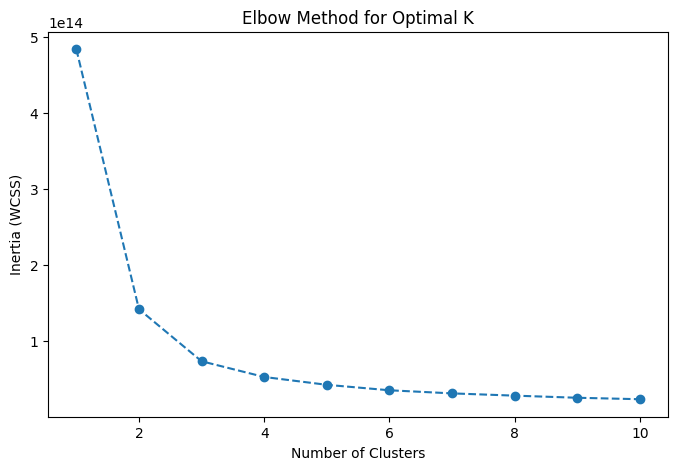

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [6]:
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

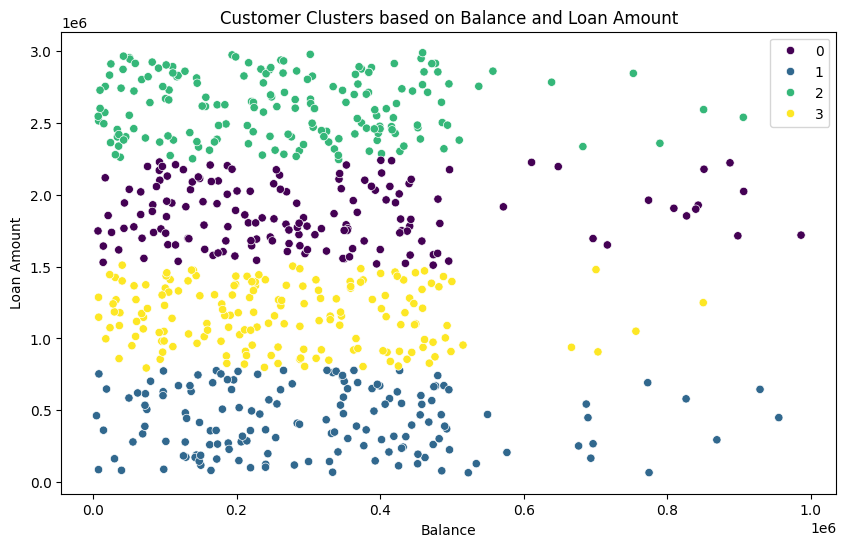

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Balance"], y=df["Loan_Amount"], hue=df["Cluster"], palette="viridis")
plt.xlabel("Balance")
plt.ylabel("Loan Amount")
plt.title("Customer Clusters based on Balance and Loan Amount")
plt.legend()
plt.show()